# Automatic Gradients

In [1]:
import numpy as np
import tensorflow as tf
import jax
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

2022-09-10 10:41:53.135722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-10 10:41:53.448287: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-10 10:41:54.094083: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jaidevd/conda/lib:
2022-09-10 10:41:54.094140: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: canno

## What is a derivative of a function?

**A measure of how the function changes when changes are made to its _independent_ variable(s).**

**When this independent variable is time, this is also called the _rate of change_ of the function.**

## Example: $$ f(x) = 2x $$

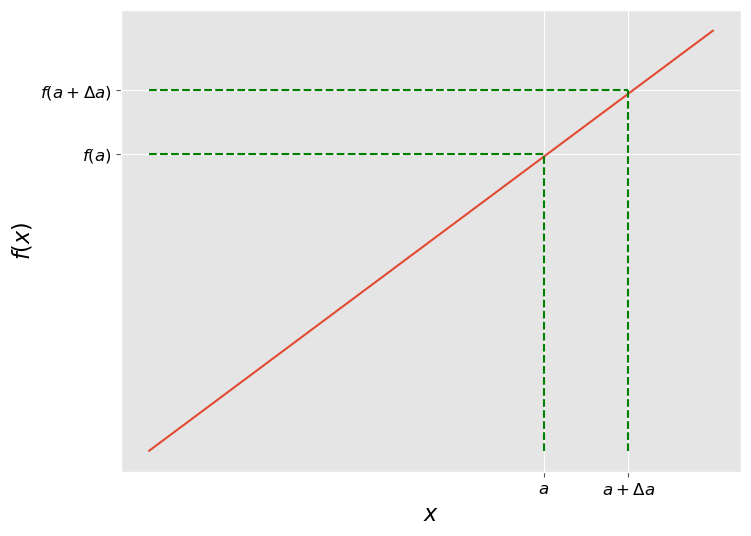

In [2]:
xx = np.linspace(0, 100, 100)
yy = 2 * xx
plt.plot(xx, yy)
plt.vlines(70, 0, yy[70], linestyles="dashed", colors="g")
plt.vlines(85, 0, yy[85], linestyles="dashed", colors="g")
plt.hlines(yy[70], 0, 70, linestyles="dashed", colors="g")
plt.hlines(yy[85], 0, 85, linestyles="dashed", colors="g")
plt.xticks([70, 85], [r"$a$", r"$a + \Delta a$"], fontsize=12, color="k")
plt.yticks([yy[70], yy[85]], [r"$f(a)$", r"$f(a + \Delta a)$"], fontsize=12, color="k")
plt.xlabel(r'$x$', fontsize=16, color="k")
_ = plt.ylabel(r'$f(x)$', fontsize=16, color="k")

## Derivative of $f$
### also called _slope_ or _gradient_ of $f$

### $$ f'(x) = \frac{df}{dx} = \lim_{x \to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x} $$

# Example: Derivative of the sigmoid function

In [3]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

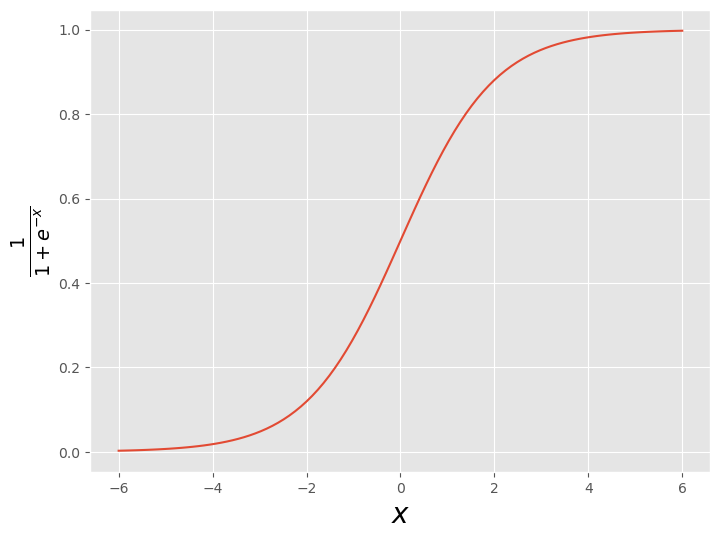

In [4]:
x = np.linspace(-6, 6, 100)
f = sigmoid(x)

plt.plot(x, f)

plt.xlabel(r'$x$', fontsize=20, color="k")
_ = plt.ylabel(r'$\frac{1}{1 + e^{-x}}$', fontsize=20, color="k")

# Chain rule of differentiation:
# $$ \frac{d}{dx}[f(g(x))] = \frac{df}{dg}\frac{dg}{dx}$$

### Suppose $$g(x) = 1 + e^{-x}$$
### $$\therefore f(x) = \frac{1}{g}$$

### Thus by chain rule:
### $$f'(x) = \frac{df}{dg} g'(x)$$
### $$\therefore f'(x) = -\frac{df}{dg}e^{-x}$$
### $$\therefore f'(x) = -\frac{d}{dg}\frac{1}{g}e^{-x}$$
### $$\therefore f'(x) = \frac{1}{g^{2}}e^{-x}$$
### $$\therefore f'(x) = \frac{e^{-x}}{(1 + e^{-x})^{2}}$$
### Adding and subtracting unity from the numerator:
### $$f'(x) = \frac{1 + e^{-x} - 1}{(1 + e^{-x})^{2}}$$
### Splitting the fraction
### $$f'(x) = \frac{1 + e^{-x}}{(1 + e^{-x})^{2}} - \frac{1}{(1 + e^{-x})^{2}}$$
### Simplifying...
### $$f'(x) = \frac{1}{1 + e^{-x}} - \frac{1}{(1 + e^{-x})^{2}}$$
### $$f'(x) = \frac{1}{1 + e^{-x}}\bigg(1 - \frac{1}{1 + e^{-x}}\bigg)$$
### Substituting for sigmoid function:
### $$f'(x) = g(1 - g)$$

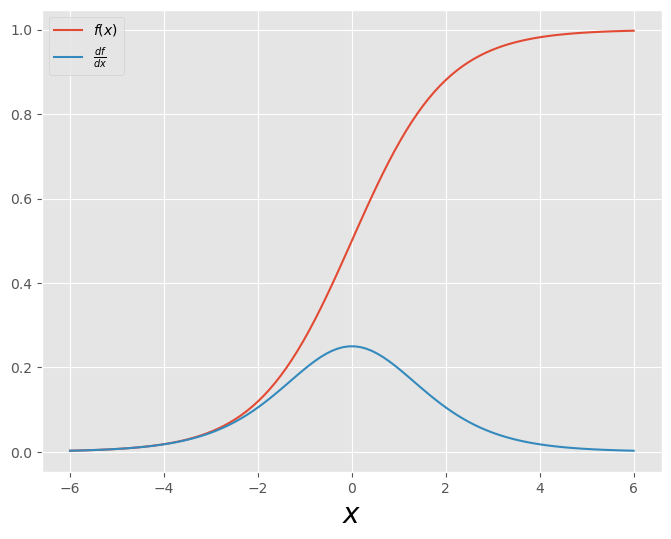

In [5]:
x = np.linspace(-6, 6, 100)
f = sigmoid(x)
df_dx = f * (1 - f)

plt.plot(x, f, label=r'$f(x)$')
plt.plot(x, df_dx, label=r'$\frac{df}{dx}$')

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.legend()

# Enter Jax

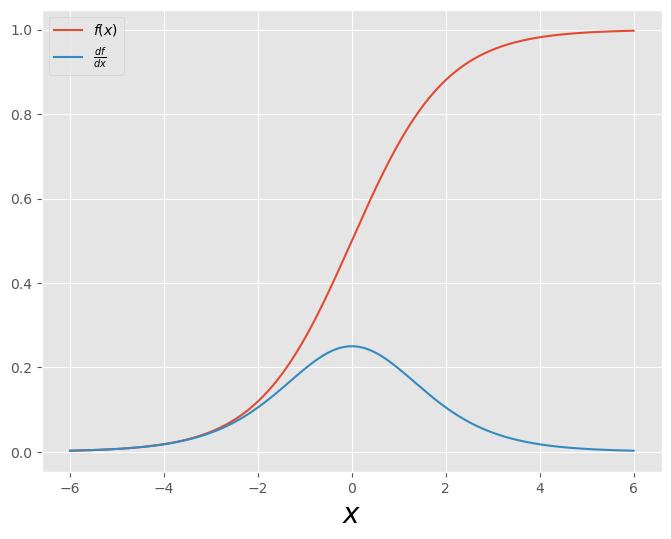

In [6]:
import jax.numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xx = np.linspace(-6, 6, 1000)
d_x = jax.grad(sigmoid)
df_dx = jax.vmap(d_x)(xx)


plt.plot(xx, sigmoid(xx), label=r'$f(x)$')
plt.plot(xx, df_dx, label=r'$\frac{df}{dx}$')

plt.xlabel(r'$x$', fontsize=20, color="k")
plt.legend()

# Exercise: Plot the Hyperbolic Tangent function and its derivative
## $$tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

In [7]:
# Enter code here

---

# Introducing Partial Derivatives
### A partial derivative of a multivariate function $f(x_{1}, x_{2}, ...)$, w.r.t. to one of it's dependent variables, say $x_{1}$ is derivative of $f$ w.r.t. $x_{1}$ assuming $x_{k} \forall k \neq 1$ to be constant.

### How many such derivatives?
### Thus, a partial derivative is always a vector.

### Given $f(x, y) = x^{2}y + y$
### Partial derivative of $f$ w.r.t $x$ is $\frac{\partial{f}}{\partial{x}}$
### Partial derivative of $f$ overall is $\nabla{f}$
### $$\nabla{f} = \begin{bmatrix}
\frac{\partial{f}}{\partial{x}}\\
\frac{\partial{f}}{\partial{y}}
\end{bmatrix}$$
### By derivation,
### $$\frac{\partial{f}}{\partial{x}} = 2xy$$
### $$\frac{\partial{f}}{\partial{y}} = x^{2} + 1$$
### Thus
### $$\nabla{f} = \begin{bmatrix}
2xy\\
x^{2} + 1
\end{bmatrix}$$


# Multivariate Functions

## E.g the Mexican Hat / Ricker Wavelet :
## $$
f(x, y) = \frac{1}{\pi\sigma^4}\Big(1 - \frac{1}{2}\Big(\frac{x^2 + y^2}{\sigma^2}\Big)\Big)e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

/tmp/ipykernel_20868/3283646234.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_20868/3283646234.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


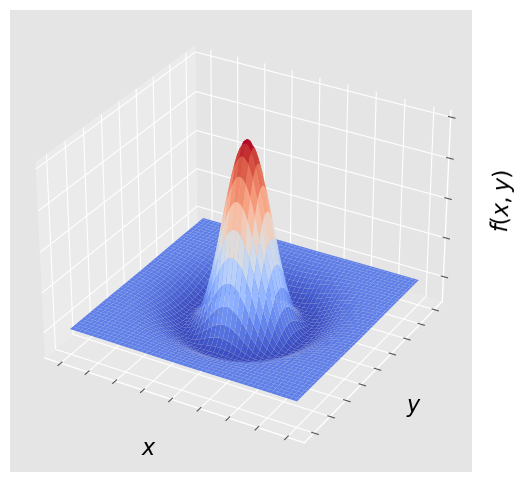

In [8]:
def mexican_hat(x, y, sigma=0.25):
    exp = -0.5 * (x ** 2 + y ** 2) / (sigma ** 2)
    return 1 / (np.pi * sigma ** 4) * (1 + exp) * np.exp(exp)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z = mexican_hat(X, Y)

# Plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel(r'$x$', fontsize=16, color="k")
ax.set_ylabel(r'$y$', fontsize=16, color="k")
ax.set_zlabel(r'$f(x, y)$', fontsize=16, color="k")
ax.autoscale_view()
plt.tight_layout()

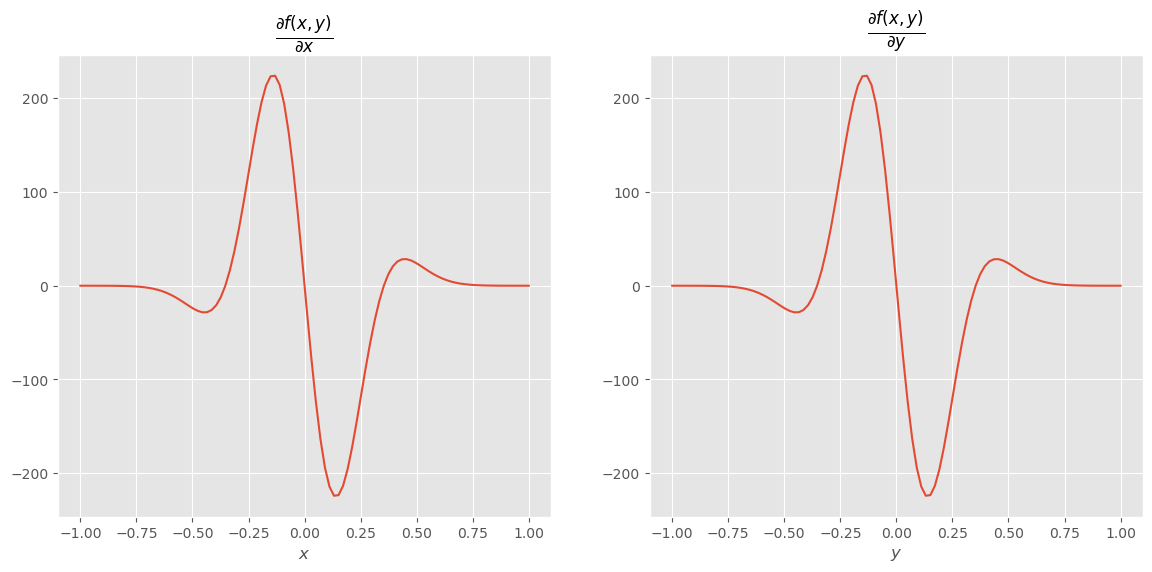

In [9]:
mh_gradx = jax.vmap(jax.grad(mexican_hat, 0))(xx, yy)
mh_grady = jax.vmap(jax.grad(mexican_hat, 1))(xx, yy)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax[0].plot(xx, mh_gradx)
ax[1].plot(yy, mh_grady)
ax[0].set_xlabel('$x$')
ax[1].set_xlabel('$y$')
ax[0].set_title(r'$\frac{\partial f(x, y)}{\partial x}$', fontsize='xx-large')
_ = ax[1].set_title(r'$\frac{\partial f(x, y)}{\partial y}$', fontsize='xx-large')
# [k.set_yticklabels([]) for k in ax.ravel()]